In [1]:
import numpy as np

data=np.load('data-AE-WS50.npy')
target=np.load('target-AE-WS50.npy')

In [2]:
train_data=data[:2500]
train_target=target[:2500]

test_data=data[2500:]
test_target=target[2500:]

print(train_data.shape)
print(test_data.shape)
print(train_target.shape)
print(test_target.shape)

(2500, 50, 1)
(639, 50, 1)
(2500, 50, 1)
(639, 50, 1)


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model=Sequential()

model.add(LSTM(units=96,return_sequences=True,input_shape=(50,1)))
model.add(Dropout(0.2))

model.add(LSTM(units=56,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=26,return_sequences=True))


model.add(LSTM(units=26,return_sequences=True))


model.add(LSTM(units=56,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=96,return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(50,activation='linear'))

model.compile(loss='mse',optimizer='adam')

c:\Users\USER\Music\DeepL\myenvdeep\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [4]:
history=model.fit(train_data,train_target,epochs=50, validation_split=0.2)

Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 65ms/step - loss: 0.0259 - val_loss: 0.0038
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 0.0039 - val_loss: 0.0010
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 0.0032 - val_loss: 0.0011
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - loss: 0.0026 - val_loss: 0.0012
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 0.0023 - val_loss: 9.8008e-04
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 0.0022 - val_loss: 9.1378e-04
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 0.0020 - val_loss: 0.0021
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 0.0019 - val_loss: 0.0012
Epoch 9/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 0.0018 - val_loss: 0.0010
Epoch 10/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0019 - val_loss: 9.1776e-04
Epoch 11/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0016 - val_loss: 0.0011
Epoch 12/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/ste

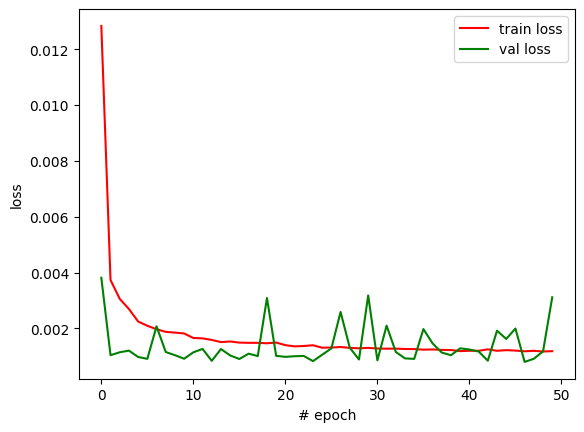

In [5]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],'r',label='train loss')
plt.plot(history.history['val_loss'],'g',label='val loss')
plt.xlabel('# epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [14]:
"""
import numpy as np
import matplotlib.pyplot as plt

# Get the first 10-day sequence from the test data
first_10_days_test_data = test_data[0]

# Reshape if necessary (depending on your model input shape)
# Example: if model input shape is (batch_size, time_steps, features)
first_10_days_test_data = first_10_days_test_data.reshape((1, 10, -1))

# Make predictions
predictions = model.predict(first_10_days_test_data)

# Flatten predictions and the first 10 days of test data for plotting
predictions = predictions.flatten()
first_10_days_test_data = first_10_days_test_data.flatten()
test_target_0 = test_target[0].flatten()  # Assuming test_target[0] is the actual next 10 days

# Create x-values for plotting
x_values = np.arange(10)  # [0, 1, 2, ..., 9]

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(x_values, test_target_0, 'b', label='Actual')
plt.plot(x_values, predictions, 'g', label='Predicted', linestyle='dashed')
plt.title('First 10 Days of Test Data and Predictions')
plt.xlabel('Days')
plt.ylabel('Value')
plt.legend()
plt.show()

"""


"\nimport numpy as np\nimport matplotlib.pyplot as plt\n\n# Get the first 10-day sequence from the test data\nfirst_10_days_test_data = test_data[0]\n\n# Reshape if necessary (depending on your model input shape)\n# Example: if model input shape is (batch_size, time_steps, features)\nfirst_10_days_test_data = first_10_days_test_data.reshape((1, 10, -1))\n\n# Make predictions\npredictions = model.predict(first_10_days_test_data)\n\n# Flatten predictions and the first 10 days of test data for plotting\npredictions = predictions.flatten()\nfirst_10_days_test_data = first_10_days_test_data.flatten()\ntest_target_0 = test_target[0].flatten()  # Assuming test_target[0] is the actual next 10 days\n\n# Create x-values for plotting\nx_values = np.arange(10)  # [0, 1, 2, ..., 9]\n\n# Plot the results\nplt.figure(figsize=(12, 6))\nplt.plot(x_values, test_target_0, 'b', label='Actual')\nplt.plot(x_values, predictions, 'g', label='Predicted', linestyle='dashed')\nplt.title('First 10 Days of Test Da

In [7]:
result=model.predict(test_data)

test_target[0]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


array([[0.084375  ],
       [0.08541667],
       [0.08854167],
       [0.08333333],
       [0.07291667],
       [0.07291667],
       [0.06875   ],
       [0.08541667],
       [0.090625  ],
       [0.08333333],
       [0.08645833],
       [0.08333333],
       [0.08854167],
       [0.0875    ],
       [0.08645833],
       [0.08333333],
       [0.08229167],
       [0.09270833],
       [0.09375   ],
       [0.09791667],
       [0.10729167],
       [0.10104167],
       [0.103125  ],
       [0.109375  ],
       [0.10416667],
       [0.10520833],
       [0.10208333],
       [0.10416667],
       [0.10416667],
       [0.10625   ],
       [0.10416667],
       [0.10208333],
       [0.08854167],
       [0.08333333],
       [0.10416667],
       [0.096875  ],
       [0.09375   ],
       [0.10104167],
       [0.1       ],
       [0.09791667],
       [0.09895833],
       [0.09895833],
       [0.09791667],
       [0.09895833],
       [0.09895833],
       [0.10520833],
       [0.10416667],
       [0.104

In [8]:
result[0]

array([0.0762995 , 0.07506259, 0.07042311, 0.07204375, 0.07231305,
       0.07749715, 0.06533753, 0.07116026, 0.0679305 , 0.06903967,
       0.07818255, 0.07369795, 0.07380038, 0.07535916, 0.06605081,
       0.07508272, 0.06429461, 0.06940129, 0.06752375, 0.06933035,
       0.06421837, 0.07276084, 0.07142744, 0.07054019, 0.07243043,
       0.073037  , 0.06721872, 0.07255337, 0.06208286, 0.06830376,
       0.06072967, 0.05970177, 0.05920905, 0.06692284, 0.06443962,
       0.0646933 , 0.0651212 , 0.06013492, 0.06550851, 0.06544561,
       0.05521622, 0.06474973, 0.05387275, 0.06247051, 0.05948177,
       0.05652212, 0.05579756, 0.05444135, 0.05707236, 0.05996965],
      dtype=float32)

In [9]:
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Assuming model.predict(test_data) gives you `result`
result = model.predict(test_data)

# Ensure `result` and `test_target` are aligned in shape
# Flatten `result` to match the shape of `test_target`
result_flat = result.flatten()

# Assuming `test_target` is already in the shape (719, 10, 1),
# flatten it to match `result_flat`
test_target_flat = test_target.reshape(-1)

# Calculate R2 score
r2 = r2_score(test_target_flat, result_flat)
print('R2 score:', r2)

# Calculate Mean Squared Error
mse = mean_squared_error(test_target_flat, result_flat)
print('Mean Squared Error:', mse)

# Calculate Mean Absolute Error
mae = mean_absolute_error(test_target_flat, result_flat)
print('Mean Absolute Error:', mae)

# Define a threshold for accuracy (e.g., within 5% of the actual value)
threshold = 0.05

# Calculate the number of accurate predictions
accurate_predictions = np.abs((result_flat - test_target_flat) / test_target_flat) < threshold

# Calculate accuracy as the percentage of accurate predictions
accuracy = np.mean(accurate_predictions)
print('Accuracy:', accuracy)



20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
R2 score: 0.5772793098452743
Mean Squared Error: 0.008266231047675912
Mean Absolute Error: 0.06096721864968585
Accuracy: 0.1638184663536776


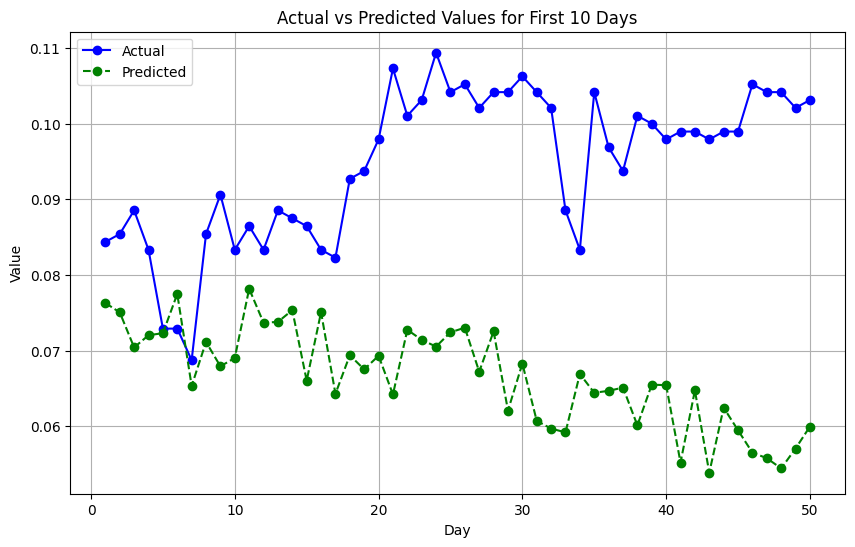

In [10]:
import matplotlib.pyplot as plt

# Assuming test_data is your input data and result is your predicted output
# Extract the first sequence of 10 days from test_data
first_sequence_test_data = test_data[0]
first_sequence_test_target = test_target[0]

# Extract the corresponding predicted values from result
predicted_values = result[0]

# Create x values for plotting (days)
days = range(1, 51)  # assuming each day is from 1 to 50

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(days, first_sequence_test_target, marker='o', linestyle='-', color='b', label='Actual')
plt.plot(days, predicted_values, marker='o', linestyle='--', color='g', label='Predicted')
plt.title('Actual vs Predicted Values for First 10 Days')
plt.xlabel('Day')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


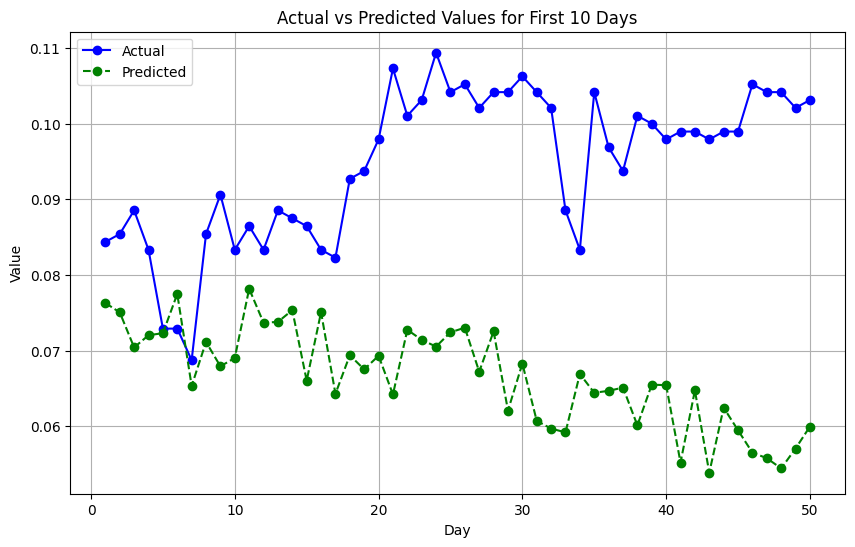

In [11]:
import matplotlib.pyplot as plt

# Extract the actual values for the first 10 days from test_target
actual_values = test_target[0]

# Extract the predicted values for the first 10 days from result
predicted_values = result[0]

# Create x values for plotting (days)
days = range(1, 51)  # assuming each day is from 1 to 10

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(days, actual_values, marker='o', linestyle='-', color='b', label='Actual')
plt.plot(days, predicted_values, marker='o', linestyle='--', color='g', label='Predicted')
plt.title('Actual vs Predicted Values for First 10 Days')
plt.xlabel('Day')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


In [12]:
from sklearn.metrics import r2_score

best_row_index = -1
best_r2_score = 0

# Iterate through each row in test_data
for i in range(len(test_data)):
    # Get the actual values for this row
    actual_values = test_target[i]  # Flatten or reshape as needed
    
    # Get the predicted values for this row
    predicted_values = result[i]
    
    # Calculate R2 score for this row
    r2 = r2_score(actual_values, predicted_values)
    
    # Update best row index and R2 score if this row has a higher score
    if r2 > best_r2_score:
        best_r2_score = r2
        best_row_index = i

# Print the index and R2 score of the best row
print(f"The row with the highest R2 score is row {best_row_index}, with R2 score = {best_r2_score:.4f}")


The row with the highest R2 score is row 594, with R2 score = 0.2553


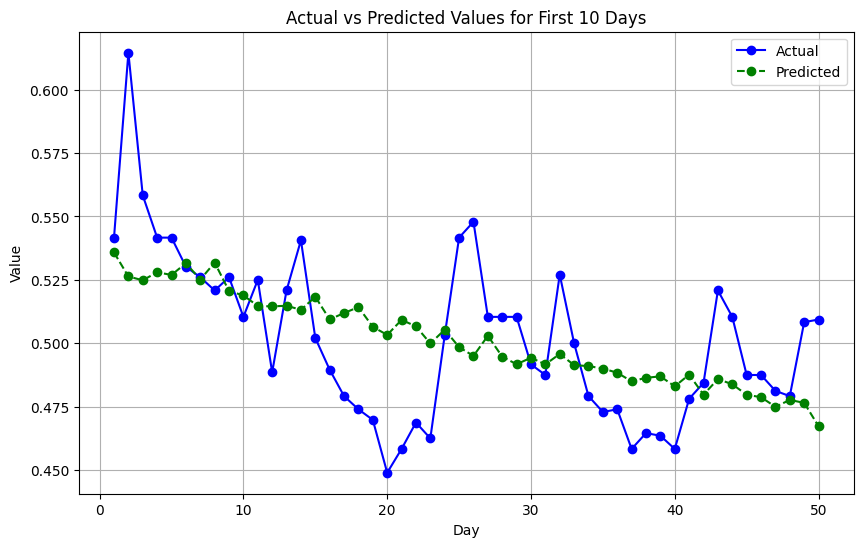

In [13]:
import matplotlib.pyplot as plt

# Assuming test_data is your input data and result is your predicted output
# Extract the first sequence of 10 days from test_data
first_sequence_test_data = test_data[594]
first_sequence_test_target = test_target[594]

# Extract the corresponding predicted values from result
predicted_values = result[594]

# Create x values for plotting (days)
days = range(1, 51)  # assuming each day is from 1 to 10

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(days, first_sequence_test_target, marker='o', linestyle='-', color='b', label='Actual')
plt.plot(days, predicted_values, marker='o', linestyle='--', color='g', label='Predicted')
plt.title('Actual vs Predicted Values for First 10 Days')
plt.xlabel('Day')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


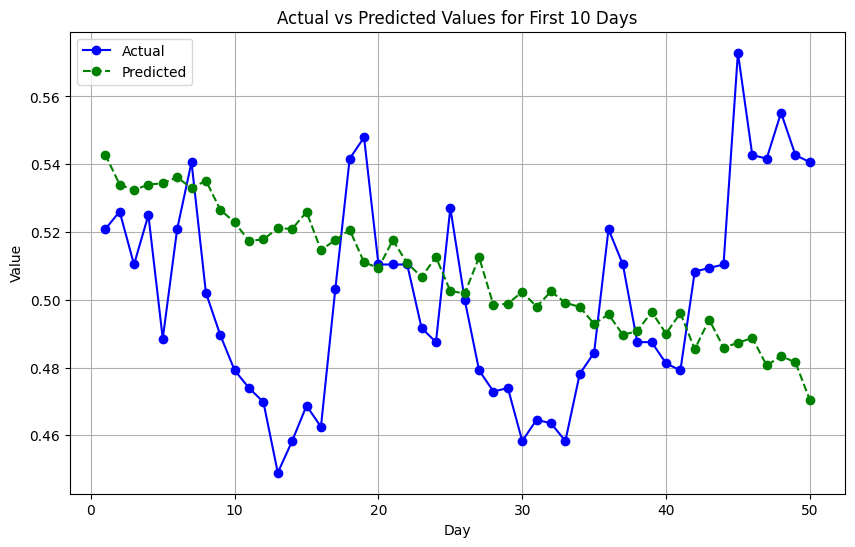

In [15]:
import matplotlib.pyplot as plt

# Assuming test_data is your input data and result is your predicted output
# Extract the first sequence of 10 days from test_data
first_sequence_test_data = test_data[601]
first_sequence_test_target = test_target[601]

# Extract the corresponding predicted values from result
predicted_values = result[601]

# Create x values for plotting (days)
days = range(1, 51)  # assuming each day is from 1 to 10

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(days, first_sequence_test_target, marker='o', linestyle='-', color='b', label='Actual')
plt.plot(days, predicted_values, marker='o', linestyle='--', color='g', label='Predicted')
plt.title('Actual vs Predicted Values for First 10 Days')
plt.xlabel('Day')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()
